In [0]:
!pip install OpenNMT-py

In [0]:
!git clone https://github.com/OpenNMT/OpenNMT-py.git
!cd OpenNMT-py && python setup.py install

In [1]:
!unzip Corpora.zip

Archive:  Corpora.zip
   creating: Corpora/
   creating: Corpora/En2Fa-Translation/
   creating: Corpora/En2Fa-Translation/Dev/
  inflating: Corpora/En2Fa-Translation/Dev/dev.en  
  inflating: Corpora/En2Fa-Translation/Dev/dev.fa  
   creating: Corpora/En2Fa-Translation/Test/
  inflating: Corpora/En2Fa-Translation/Test/test.en  
  inflating: Corpora/En2Fa-Translation/Test/test.fa0  
  inflating: Corpora/En2Fa-Translation/Test/test.fa1  
  inflating: Corpora/En2Fa-Translation/Test/test.fa2  
  inflating: Corpora/En2Fa-Translation/Test/test.fa3  
   creating: Corpora/En2Fa-Translation/Train/
  inflating: Corpora/En2Fa-Translation/Train/train.en  
  inflating: Corpora/En2Fa-Translation/Train/train.fa  
   creating: Corpora/Transliteration/
  inflating: Corpora/Transliteration/dev.en  
  inflating: Corpora/Transliteration/dev.fa  
  inflating: Corpora/Transliteration/test.en  
  inflating: Corpora/Transliteration/test.fa  
  inflating: Corpora/Transliteration/train.en  
  inflating: Corpor

In [2]:
!onmt_preprocess -train_src Corpora/En2Fa-Translation/Train/train.en -train_tgt Corpora/En2Fa-Translation/Train/train.fa -valid_src Corpora/En2Fa-Translation/Dev/dev.en -valid_tgt Corpora/En2Fa-Translation/Dev/dev.fa -save_data ./demo

[2020-06-02 15:21:02,199 INFO] Extracting features...
[2020-06-02 15:21:02,199 INFO]  * number of source features: 0.
[2020-06-02 15:21:02,199 INFO]  * number of target features: 0.
[2020-06-02 15:21:02,199 INFO] Building `Fields` object...
[2020-06-02 15:21:02,199 INFO] Building & saving training data...
[2020-06-02 15:21:02,243 INFO] Building shard 0.
[2020-06-02 15:21:03,256 INFO]  * saving 0th train data shard to ./demo.train.0.pt.
[2020-06-02 15:21:04,030 INFO]  * tgt vocab size: 5908.
[2020-06-02 15:21:04,035 INFO]  * src vocab size: 3116.
[2020-06-02 15:21:04,102 INFO] Building & saving validation data...
[2020-06-02 15:21:04,131 INFO] Building shard 0.
[2020-06-02 15:21:04,137 INFO]  * saving 0th valid data shard to ./demo.valid.0.pt.


In [3]:
!onmt_train -data demo -save_model demo-model -train_steps 50000 -save_checkpoint_steps 1200 -valid_steps 1200 -world_size 1 -gpu_rank 0

[2020-06-02 15:21:09,397 INFO]  * src vocab size = 3116
[2020-06-02 15:21:09,397 INFO]  * tgt vocab size = 5908
[2020-06-02 15:21:09,397 INFO] Building model...
[2020-06-02 15:21:19,192 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(3116, 500, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(500, 500, num_layers=2, dropout=0.3)
  )
  (decoder): InputFeedRNNDecoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(5908, 500, padding_idx=1)
        )
      )
    )
    (dropout): Dropout(p=0.3, inplace=False)
    (rnn): StackedLSTM(
      (dropout): Dropout(p=0.3, inplace=False)
      (layers): ModuleList(
        (0): LSTMCell(1000, 500)
        (1): LSTMCell(500, 500)
      )
    )
    (attn): GlobalAttention(
      (linear_in): Linear(in_features=500, out_features=500, bias=False)
      (li

In [4]:
!onmt_translate -model demo-model_step_50000.pt -src Corpora/En2Fa-Translation/Test/test.en -output pred.txt -replace_unk -verbose

[2020-06-02 15:56:12,704 INFO] Translating shard 0.
/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.

SENT 1: ['hello', ',', 'do', 'we', 'drive', 'together', 'to', 'Hanover', 'on', 'the', 'twenty-eighth', 'of', 'March', '?']
PRED 1: سلام ، آیا ما میتوانیم به Hanover در twenty-eighth ؟
PRED SCORE: -2.9511

SENT 2: ['it', 'is', 'more', 'comfortable', 'by', 'train', '.']
PRED 2: بیشتری نزدیک باشد .
PRED SCORE: -1.6126

SENT 3: ['do', 'you', 'go', 'by', 'car', 'and', 'I', 'go', 'by', 'train', '?']
PRED 3: آیا شما با قطار و من با قطار و
PRED SCORE: -1.6477

SENT 4: ['I', 'would', 'like', 'to', 'go', 'by', 'train', '.', 'and', 'what', 'would', 'you', 'like', '?']
PRED 4: من با قطار . و چه دوست دارید که دوست دارید ؟
PRED SCORE: -1.6633

SENT 5: ['if', 'we', 'take', 'the', '$I-$C-$E', 'train', 'at', 

In [5]:
!perl OpenNMT-py/tools/multi-bleu.perl Corpora/En2Fa-Translation/Test/test.fa0 < pred.txt

BLEU = 17.12, 58.9/27.1/13.1/6.0 (BP=0.910, ratio=0.914, hyp_len=2461, ref_len=2692)


In [6]:
!perl OpenNMT-py/tools/multi-bleu.perl Corpora/En2Fa-Translation/Test/test.fa1 < pred.txt

BLEU = 18.38, 59.9/28.4/14.4/7.0 (BP=0.903, ratio=0.907, hyp_len=2461, ref_len=2713)


In [7]:
!perl OpenNMT-py/tools/multi-bleu.perl Corpora/En2Fa-Translation/Test/test.fa2 < pred.txt

BLEU = 12.50, 52.3/20.6/9.1/3.7 (BP=0.907, ratio=0.911, hyp_len=2461, ref_len=2700)


In [8]:
!perl OpenNMT-py/tools/multi-bleu.perl Corpora/En2Fa-Translation/Test/test.fa3 < pred.txt

BLEU = 13.53, 51.5/21.1/9.2/4.0 (BP=0.955, ratio=0.956, hyp_len=2461, ref_len=2575)


In [0]:
from tqdm import tqdm
bleus = list()
for i in tqdm(range(1200,50000,1200)) :
  s = !onmt_translate -model demo-model_step_{i}.pt -src Corpora/En2Fa-Translation/Dev/dev.en -output pred.dev_{i}.txt -replace_unk -verbose
  f = !perl OpenNMT-py/tools/multi-bleu.perl Corpora/En2Fa-Translation/Dev/dev.fa < pred.dev_{i}.txt
  bleus.append(float(f[0].split()[2][:-1]))

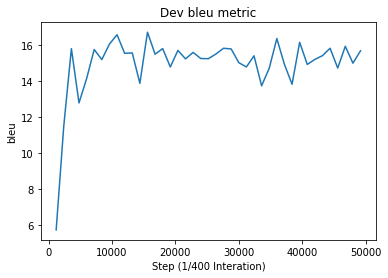

In [0]:
import matplotlib.pyplot as plt
plt.plot(range(1200,50000,1200), bleus)
plt.title('Dev bleu metric')
plt.ylabel('bleu')
plt.xlabel('Step (1/400 Interation)')
plt.show()

In [0]:
testen = open("Corpora/En2Fa-Translation/Test/test.en").read().split('\n')
testfa0 = open("Corpora/En2Fa-Translation/Test/test.fa0").read().split('\n')
testfa1 = open("Corpora/En2Fa-Translation/Test/test.fa1").read().split('\n')
testfa2 = open("Corpora/En2Fa-Translation/Test/test.fa2").read().split('\n')
testfa3 = open("Corpora/En2Fa-Translation/Test/test.fa3").read().split('\n')
pred = open("pred.txt").read().split('\n')
def hand_check(i) :
  print(45*'=',i)
  print(testen[i-1])
  print(45*'-')
  print(testfa0[i-1])
  print(testfa1[i-1])
  print(testfa2[i-1])
  print(testfa3[i-1])
  print(45*'-')
  print(pred[i-1])
  print(45*'=')

In [0]:
for i in [223,224,161,177,218,219,222] :
  hand_check(i)

============================================= 223
during a flight I always get sick . I would like to take the train .
---------------------------------------------
من همیشه در طول پرواز حالم بد میشود . دوست دارم سوار قطار شوم .
من همیشه درطول یک پرواز مریض میشوم . من مایلم قطار بگیریم .
من همیشه در طول مدت پرواز مریض میشوم . من ترجیح میدهم که قطار بگیرم .
درطی پرواز من همیشه مریض میشوم . من دوست دارم قطار بگیرم .
---------------------------------------------
پرواز دارم من همیشه . دوست دارم از .
============================================= 224
well , I would like to take the train . during a flight I get sick .
---------------------------------------------
خوب ، دوست دارم قطار بگیریم . در طول پرواز حالم بد میشود .
خوب ، من مایلم قطار بگیریم . من در طول پرواز مریض میشوم .
خوب است , من دوست دارم که قطار بگیرم . در طول مدت پرواز من مریض میشوم .
خب ، من دوست دارم قطار بگیرم . درطی پرواز من مریض میشوم .
---------------------------------------------
خب ، من میخواهم آن را از . یک پرواز دارم 

In [9]:
!onmt_translate -model demo-model_step_50000.pt -src Corpora/En2Fa-Translation/Test/test.en -output pred.without_replace_unk.txt -verbose

[2020-06-02 16:18:22,596 INFO] Translating shard 0.
/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.

SENT 1: ['hello', ',', 'do', 'we', 'drive', 'together', 'to', 'Hanover', 'on', 'the', 'twenty-eighth', 'of', 'March', '?']
PRED 1: سلام ، آیا ما میتوانیم به Hanover در twenty-eighth ؟
PRED SCORE: -2.9511

SENT 2: ['it', 'is', 'more', 'comfortable', 'by', 'train', '.']
PRED 2: بیشتری نزدیک باشد .
PRED SCORE: -1.6126

SENT 3: ['do', 'you', 'go', 'by', 'car', 'and', 'I', 'go', 'by', 'train', '?']
PRED 3: آیا شما با قطار و من با قطار و
PRED SCORE: -1.6477

SENT 4: ['I', 'would', 'like', 'to', 'go', 'by', 'train', '.', 'and', 'what', 'would', 'you', 'like', '?']
PRED 4: من با قطار . و چه دوست دارید که دوست دارید ؟
PRED SCORE: -1.6633

SENT 5: ['if', 'we', 'take', 'the', '$I-$C-$E', 'train', 'at', 

In [10]:
!perl OpenNMT-py/tools/multi-bleu.perl Corpora/En2Fa-Translation/Test/test.fa0 < pred.without_replace_unk.txt

BLEU = 17.12, 58.9/27.1/13.1/6.0 (BP=0.910, ratio=0.914, hyp_len=2461, ref_len=2692)


In [11]:
!perl OpenNMT-py/tools/multi-bleu.perl Corpora/En2Fa-Translation/Test/test.fa1 < pred.without_replace_unk.txt

BLEU = 18.38, 59.9/28.4/14.4/7.0 (BP=0.903, ratio=0.907, hyp_len=2461, ref_len=2713)


In [12]:
!perl OpenNMT-py/tools/multi-bleu.perl Corpora/En2Fa-Translation/Test/test.fa2 < pred.without_replace_unk.txt

BLEU = 12.50, 52.3/20.6/9.1/3.7 (BP=0.907, ratio=0.911, hyp_len=2461, ref_len=2700)


In [13]:
!perl OpenNMT-py/tools/multi-bleu.perl Corpora/En2Fa-Translation/Test/test.fa3 < pred.without_replace_unk.txt

BLEU = 13.53, 51.5/21.1/9.2/4.0 (BP=0.955, ratio=0.956, hyp_len=2461, ref_len=2575)
